https://www.youtube.com/watch?v=uCRkFwQqdJo&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
os.chdir("/Users/daniel421/Desktop/STAT_724/ds_724")

In [3]:
porosity_1d_array = np.fromfile('/Users/daniel421/Desktop/STAT_724/porosity_truth_map.dat') # load binary data file
print('porosity_1d_array is a ' + str(type(porosity_1d_array)))

porosity_1d_array is a <class 'numpy.ndarray'>


In [4]:
porosity_1d_array

array([ 9.47058121,  9.91782937,  9.9798204 , ..., 10.76326531,
       10.30917151, 10.86594983])

In [5]:
np.set_printoptions(precision = 3, threshold = 100) #remove truncation from array visualization
porosity_1d_array

array([ 9.471,  9.918,  9.98 , ..., 10.763, 10.309, 10.866])

### CHECK THE SIZE AND DIMENSIONS OF NDARRAYS

In [6]:
porosity_1d_array.shape

(10000,)

### RESHAPE NDARRAYS

In [7]:
porosity_map = np.reshape(porosity_1d_array,[100,100]) # reshape the array to 100x100
print('The porosity map has a shape ' + str(porosity_map.shape) + '.')
ny = porosity_map.shape[0]
nx = porosity_map.shape[1]
print('Our 2D array has number of x cells =' + str(nx) + ', and y cells = ' + str(ny)+ '.')

The porosity map has a shape (100, 100).
Our 2D array has number of x cells =100, and y cells = 100.


### FLATTEN NDARRAYS

In [8]:
flatten_porosity_map = porosity_map.flatten() #flatten the 2D map
print('The flattened porosity map has a shape ' + str(flatten_porosity_map.shape) + '.')

The flattened porosity map has a shape (10000,).


### Read and Write Binary Files

In [9]:
porosity_map.tofile("porosity_test.dat")        # save our 2D array to 1D binary file
porosity_test = np.fromfile('porosity_test.dat') # read the 1D binary back to 1D array
check = np.array_equal(porosity_map,np.reshape(porosity_test,[100,100])) # check if loaded = saved
print('Is the array we wrote out and read back in the same as the original array? ' + str(check) + '.')

Is the array we wrote out and read back in the same as the original array? True.


### WRITE ASCII COMMA DELIMITED FILES

In [10]:
np.savetxt("/Users/daniel421/Desktop/STAT_724/porosity_map.csv", porosity_map, delimiter = ",") # save our 2D array to 2D comma delimited

### READ ASCII COMMA DELIMITED FILES

In [11]:
porosity_map_test = np.loadtxt("/Users/daniel421/Desktop/STAT_724/porosity_map.csv", delimiter=",") # load the csv
test = np.array_equal(porosity_map,porosity_map_test) # check if the arrays are the same
print('Is the array we wrote out and read back in the same as the original array? ' + str(test) + '.')
print('The loaded array has a shape ' + str(porosity_map_test.shape) + '.')

Is the array we wrote out and read back in the same as the original array? True.
The loaded array has a shape (100, 100).


### SLICING NDARRAYS

In [12]:
top_corner = porosity_map[:5,:5]                # extract the lop left corner
print('The type for the slice is ' + str(type(top_corner)) + '.')
print('The shape of the slice is ' + str(top_corner.shape) + '.')
top_corner

The type for the slice is <class 'numpy.ndarray'>.
The shape of the slice is (5, 5).


array([[ 9.471,  9.918,  9.98 ,  9.916, 10.699],
       [ 8.676,  8.945,  9.267, 10.003, 11.012],
       [ 9.139,  8.934,  9.878, 10.908, 10.909],
       [ 8.335,  8.695,  9.284, 10.609, 11.524],
       [ 9.359,  9.917, 10.049, 10.772, 11.161]])

In [13]:
first_column = top_corner[:,0]                  # extract the first column
print('The shape of the slice is ' + str(first_column.shape) + '.')
first_column

The shape of the slice is (5,).


array([9.471, 8.676, 9.139, 8.335, 9.359])

In [14]:
last_2_rows = top_corner[-2:,:]
print('The shape of the slice is ' + str(last_2_rows.shape) + '.')
last_2_rows

The shape of the slice is (2, 5).


array([[ 8.335,  8.695,  9.284, 10.609, 11.524],
       [ 9.359,  9.917, 10.049, 10.772, 11.161]])

In [15]:
print('The original value for porosity_map at [99,99] is ' + str(porosity_map[99,99]) + '.')
bottom_right_corner = porosity_map[-3:,-3:]     # make a slice
bottom_right_corner[2,2] = -13.0                # change a value in our slice
porosity_map                                    # check the original ndarray

The original value for porosity_map at [99,99] is 10.865949834361123.


array([[  9.471,   9.918,   9.98 , ...,   8.087,   7.999,   7.675],
       [  8.676,   8.945,   9.267, ...,   9.101,   8.915,   8.722],
       [  9.139,   8.934,   9.878, ...,   8.432,   9.246,   8.535],
       ...,
       [  8.356,   9.193,   9.207, ...,  10.641,  12.386,  12.626],
       [  8.733,   9.15 ,   9.277, ...,  11.116,  11.357,  11.885],
       [  9.096,   9.749,  10.012, ...,  10.763,  10.309, -13.   ]])

In [16]:
porosity_map[-1:,-1:] = 10.866                  # restore the lower, right element value

### Reading Elements from ndarrays

In [17]:
single_element = porosity_map[2,2]              # extract an element
#single_element = porosity_map[2][2]             # this does the same thing
print('The type for a single element is ' + str(type(single_element)) + '.')
single_element

The type for a single element is <class 'numpy.float64'>.


9.877516184936288

### Visualizing ndarrays w/ Line Plots

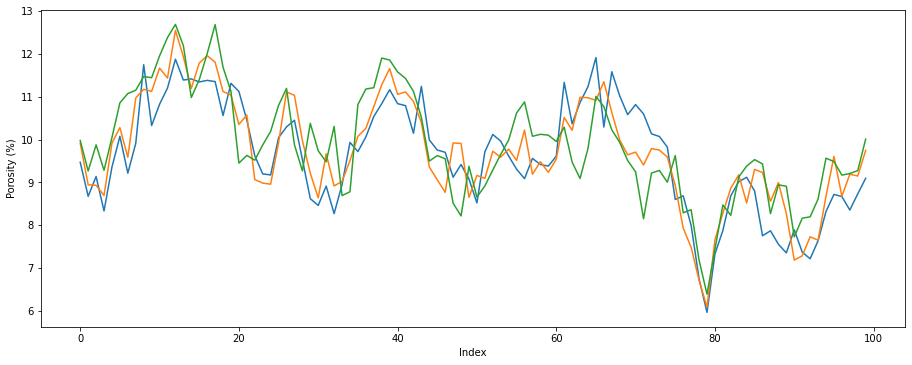

In [18]:
plt.plot(porosity_map[:,:3])                    # plot the first 3 columns
plt.xlabel('Index'); plt.ylabel('Porosity (%)') # add labels to axes

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2) # set the plot scale
plt.show()                                      # close the plot

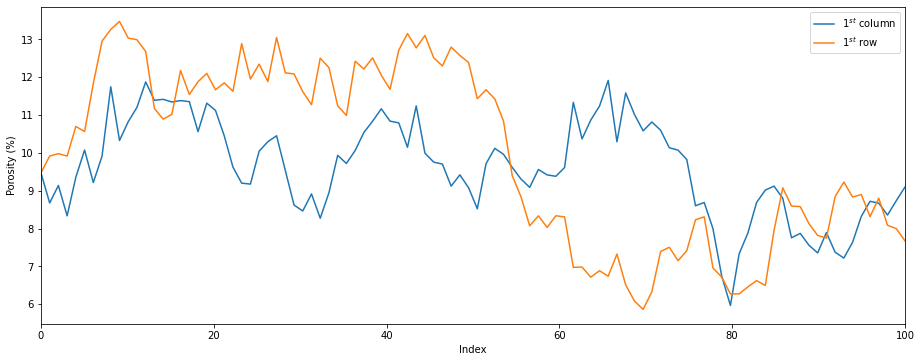

In [19]:
plt.plot(np.linspace(0,100,100),porosity_map[:,0], label = '$1^{st}$ column') # plot the first column
plt.plot(np.linspace(0,100,100),porosity_map[0,:], label = '$1^{st}$ row') # plot the first column
plt.xlim([0,100])                               # specify the min and max
plt.xlabel('Index'); plt.ylabel('Porosity (%)') # add labels to axes
plt.legend()                                    # add a legend
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2) # set the plot scale
plt.show()                                      # close the plot

### VISUALIZING 2D NDARRAYS, SPECIFY THE COORDINATES

In order to plot a 2D ndarray we need to know the coordinates. A simple specification is possible by assuming:

- equal element sizes, regular grid

- alignment with the X and Y coodinates, no rotation

We specify the following:

- extents of the array in X, xmin and xmax, and Y, ymin and ymax

- cell size, cell_size

- color bar, extents of feature, vmin and vmax and color map inferno

In [20]:
xmin = 0.0;xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cell_size = 10.0; vmin = 4.0; vmax = 16.0; cmap = plt.cm.inferno


### Visualizing 2D ndarrays - Optional, Depends on GeostatsPy Package

The GeostatsPy package includes a convenience function for plotting 2D gridded data, like 2D ndarrays

- The function is similar to GSLIB's pixelplt function

- It uses MatPlotLib functionality, produces a fine contour plot

- Reads the index correctly, but indicates a lower left origin (Geo-EAS format)

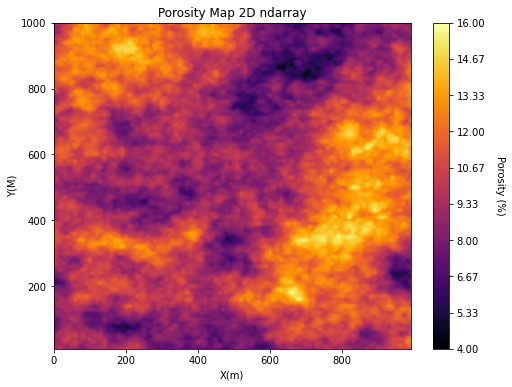

In [23]:
# optional - depends on GeostatsPy
import geostatspy.GSLIB as GSLIB                # for pixelplots
GSLIB.pixelplt(porosity_map,xmin,xmax,ymin,ymax,cell_size,vmin,vmax,"Porosity Map 2D ndarray","X(m)","Y(M)","Porosity (%)",cmap,"Porosity_Map")
plt.show()   

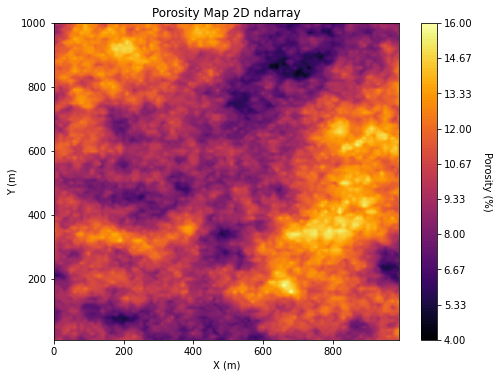

In [24]:
xx, yy = np.meshgrid(                           # make 2D ndarrays with x and y coordinates
  np.arange(xmin,xmax,cell_size), np.arange(ymax, ymin, -1 * cell_size)
)
im = plt.contourf(xx,yy,porosity_map,cmap=cmap,vmin=vmin,vmax=vmax, # contour plot
  levels=np.linspace(vmin, vmax, 100),
)
plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Porosity Map 2D ndarray') # label the axes
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10)) # make a color bar
cbar.set_label('Porosity (%)', rotation=270, labelpad=20) # label the color bar
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2) # set the plot scale
plt.show()                                      # close the plot

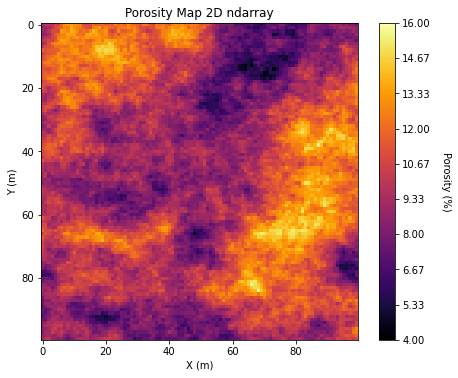

In [25]:
im = plt.imshow(porosity_map,vmin=vmin,vmax=vmax,cmap=cmap) # plot the 2D array
plt.xlabel('X (m)'); plt.ylabel('Y (m)'); plt.title('Porosity Map 2D ndarray') # label the axes
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10)) # make a color bar
cbar.set_label('Porosity (%)', rotation=270, labelpad=20) # label the color bar

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2) # set the plot scale
plt.show()                                      # close the plot

### Summary Statistics from ndarrays¶

In [26]:
stats.describe(porosity_map.flatten())          # various summary statistics


DescribeResult(nobs=10000, minmax=(3.907361729887783, 15.807357455360307), mean=10.000000005016563, variance=4.000400048693306, skewness=0.13942790638620003, kurtosis=-0.5302829766005894)

In [27]:
mean_por = np.mean(porosity_map)                # individual summary statistics
stdev_por = np.std(porosity_map)
min_por = np.min(porosity_map)
max_por = np.max(porosity_map)
P10_por,P90_por = np.percentile(porosity_map,[0.10,0.90])
print('Summary Statistics of Porosity \n Mean = ' + str(mean_por) + ', StDev = ' + str(stdev_por))
print(' Min = ' + str(min_por) + ', Max = ' + str(max_por))
print(' P10 = ' + str(P10_por) + ', P90 = ' + str(P90_por))

Summary Statistics of Porosity 
 Mean = 10.000000005016563, StDev = 2.000000002172109
 Min = 3.907361729887783, Max = 15.807357455360307
 P10 = 4.787387901474506, P90 = 5.715627120619864


### Reading and Writing Elements of ndarrays

In [28]:
array_element = porosity_map[0,0]               # read value at location 0,0, top left corner
print('Porosity at location 0,0 in our ndarray is ' + str(array_element) + '.')
porosity_map[0,0] = 10.0000                     # write value at location 0,0, top left corner
print('Porosity at location 0,0 in our ndarray is now ' + str(porosity_map[0,0]) + '.')

Porosity at location 0,0 in our ndarray is 9.470581208066502.
Porosity at location 0,0 in our ndarray is now 10.0.


### Check ndarray for Missing Values

In [29]:
porosity_map[0,1] = np.nan                      # add another NaN
porosity_map[2,1] = np.nan                      # add another NaN
result = np.isnan(porosity_map).any()
print('Are there any missing values in this array? ' + str(result))

Are there any missing values in this array? True


### Find Missing Values in a ndarray

In [30]:
nan_list = np.argwhere(np.isnan(porosity_map))  # get list of indices of array with NaNs
print('The indices with missing values are:\n' + str(nan_list) + '.')

The indices with missing values are:
[[0 1]
 [2 1]].


### Constant Value Imputation for an ndarray

In [31]:
porosity_map = np.nan_to_num(porosity_map,nan=0.01) # replace NaN values
porosity_map

array([[1.000e+01, 1.000e-02, 9.980e+00, ..., 8.087e+00, 7.999e+00,
        7.675e+00],
       [8.676e+00, 8.945e+00, 9.267e+00, ..., 9.101e+00, 8.915e+00,
        8.722e+00],
       [9.139e+00, 1.000e-02, 9.878e+00, ..., 8.432e+00, 9.246e+00,
        8.535e+00],
       ...,
       [8.356e+00, 9.193e+00, 9.207e+00, ..., 1.064e+01, 1.239e+01,
        1.263e+01],
       [8.733e+00, 9.150e+00, 9.277e+00, ..., 1.112e+01, 1.136e+01,
        1.189e+01],
       [9.096e+00, 9.749e+00, 1.001e+01, ..., 1.076e+01, 1.031e+01,
        1.087e+01]])